In [29]:
import pandas as pd
path = r"C:\Users\pedro\Downloads\tabelas_completas.xlsx"
df = pd.read_excel(path, sheet_name="Tabela 4", header=4)
df = df.drop(0)
df.head(20)
df = df.rename(columns={"População\n (2)": "População", "Produto\nInterno Bruto\nper capita\n(1) (R$)": "PIB_per_capita", "Municípios e respectivas\nUnidades da Federação": "Município", "Produto Interno Bruto\n(R$ 1.000)": "PIB_total"})
df.head(20)

,Município,"Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita",PIB_per_capita,População
1,Catas Altas (MG),1º,920833.966388,5465
2,Canaã dos Carajás (PA),2º,894806.283083,39103
3,São Gonçalo do Rio Abaixo (MG),3º,684168.710582,11114
4,Itatiaiuçu (MG),4º,610779.654402,11354
5,Presidente Kennedy (ES),5º,580174.166905,11741
6,Conceição do Mato Dentro (MG),6º,519040.918284,17438
7,Maricá (RJ),7º,511810.816669,167668
8,Saquarema (RJ),8º,458767.957187,91938
9,Paulínia (SP),9º,457517.697535,114508
10,Campos de Júlio (MT),10º,455838.097491,7245


In [30]:
print(type(df))
print(getattr(df, "shape", None))
print(getattr(df, "columns", None))


<class 'pandas.core.frame.DataFrame'>
(110, 4)
Index(['Município',
       'Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita',
       'PIB_per_capita', 'População'],
      dtype='object')


In [31]:
# forçar conversão para numérico
df["PIB_per_capita"] = pd.to_numeric(df["PIB_per_capita"], errors="coerce")
df["População"] = pd.to_numeric(df["População"], errors="coerce")

# remover linhas vazias
df = df.dropna(subset=["PIB_per_capita", "População"]).reset_index(drop=True)

print(df.dtypes)


Município                                                                                        object
Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita     object
PIB_per_capita                                                                                  float64
População                                                                                       float64
dtype: object


In [32]:
df["PIB_total"] = df["PIB_per_capita"] * df["População"]
df["PIB_total"] = df["PIB_total"].map("{:.0f}".format)

df.head(20)

,Município,"Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita",PIB_per_capita,População,PIB_total
0,Catas Altas (MG),1º,920833.966388,5465.0,5032357626
1,Canaã dos Carajás (PA),2º,894806.283083,39103.0,34989610087
2,São Gonçalo do Rio Abaixo (MG),3º,684168.710582,11114.0,7603851049
3,Itatiaiuçu (MG),4º,610779.654402,11354.0,6934792196
4,Presidente Kennedy (ES),5º,580174.166905,11741.0,6811824894
5,Conceição do Mato Dentro (MG),6º,519040.918284,17438.0,9051035533
6,Maricá (RJ),7º,511810.816669,167668.0,85814296009
7,Saquarema (RJ),8º,458767.957187,91938.0,42178208448
8,Paulínia (SP),9º,457517.697535,114508.0,52389436509
9,Campos de Júlio (MT),10º,455838.097491,7245.0,3302547016


In [33]:
df.describe()

,PIB_per_capita,População
count,100.000000,100.000000
mean,253055.146094,32152.240000
std,143788.243080,49843.293177
min,140973.052735,1351.000000
25%,170002.860652,4826.500000
50%,208542.929090,11746.000000
75%,263476.410559,36777.500000
max,920833.966388,279704.000000


In [34]:
import numpy as np
import pandas as pd

# 1) Garantir que bases estão numéricas
df["PIB_per_capita"] = pd.to_numeric(df["PIB_per_capita"], errors="coerce")
df["População"]      = pd.to_numeric(df["População"],      errors="coerce")

# 2) Garantir uma coluna NUMÉRICA de PIB_total (não use a coluna formatada)
if df["PIB_total"].dtype == object:  # virou string?
    df["PIB_total_num"] = (
        df["PIB_total"].astype(str)
        .str.replace(r"[^0-9,.\-]", "", regex=True)  
        .str.replace(".", "", regex=False)           
        .str.replace(",", ".", regex=False)          
        .astype(float)
    )
else:
    df["PIB_total_num"] = df["PIB_total"].astype(float)

# 3) Z-score / 3σ para per capita
media_capita  = df["PIB_per_capita"].mean()
desvio_capita = df["PIB_per_capita"].std()

outliers_capita = df[
    (df["PIB_per_capita"] < media_capita - 3*desvio_capita) |
    (df["PIB_per_capita"] > media_capita + 3*desvio_capita)
]

# 4) Z-score / 3σ para PIB total (usar a coluna NUMÉRICA)
media_total  = df["PIB_total_num"].mean()
desvio_total = df["PIB_total_num"].std()

outliers_total = df[
    (df["PIB_total_num"] < media_total - 3*desvio_total) |
    (df["PIB_total_num"] > media_total + 3*desvio_total)
]

# (Opcional) salvar z-scores para inspeção
df["z_pc"]    = (df["PIB_per_capita"] - media_capita) / desvio_capita
df["z_total"] = (df["PIB_total_num"] - media_total)  / desvio_total


In [35]:
Q1_capita = df["PIB_per_capita"].quantile(0.25)
Q3_capita = df["PIB_per_capita"].quantile(0.75)
IQR_capita = Q3_capita - Q1_capita

outliers2_capita = df[(df["PIB_per_capita"] < Q1_capita - 1.5*IQR_capita) |
              (df["PIB_per_capita"] > Q3_capita + 1.5*IQR_capita)]


Q1_total = df["PIB_total_num"].quantile(0.25)
Q3_total = df["PIB_total_num"].quantile(0.75)
IQR_total = Q3_total - Q1_total

outliers2_total = df[
    (df["PIB_total_num"] < Q1_total - 1.5 * IQR_total) |
    (df["PIB_total_num"] > Q3_total + 1.5 * IQR_total)
]


In [36]:
display(outliers2_capita)
display(outliers2_total)


,Município,"Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita",PIB_per_capita,População,PIB_total,PIB_total_num,z_pc,z_total
0,Catas Altas (MG),1º,920833.966388,5465.0,5032357626,5.032358e+09,4.644182,-0.238545
1,Canaã dos Carajás (PA),2º,894806.283083,39103.0,34989610087,3.498961e+10,4.463168,1.888230
2,São Gonçalo do Rio Abaixo (MG),3º,684168.710582,11114.0,7603851049,7.603851e+09,2.998253,-0.055985
3,Itatiaiuçu (MG),4º,610779.654402,11354.0,6934792196,6.934792e+09,2.487856,-0.103484
4,Presidente Kennedy (ES),5º,580174.166905,11741.0,6811824894,6.811825e+09,2.275005,-0.112214
5,Conceição do Mato Dentro (MG),6º,519040.918284,17438.0,9051035533,9.051036e+09,1.849844,0.046755
6,Maricá (RJ),7º,511810.816669,167668.0,85814296009,8.581430e+10,1.799561,5.496461
7,Saquarema (RJ),8º,458767.957187,91938.0,42178208448,4.217821e+10,1.430665,2.398575
8,Paulínia (SP),9º,457517.697535,114508.0,52389436509,5.238944e+10,1.421970,3.123508
9,Campos de Júlio (MT),10º,455838.097491,7245.0,3302547016,3.302547e+09,1.410289,-0.361351


,Município,"Posição ocupada pelos 100 maiores municípios, em relação ao Produto Interno Bruto per capita",PIB_per_capita,População,PIB_total,PIB_total_num,z_pc,z_total
1,Canaã dos Carajás (PA),2º,894806.283083,39103.0,34989610087,3.498961e+10,4.463168,1.888230
6,Maricá (RJ),7º,511810.816669,167668.0,85814296009,8.581430e+10,1.799561,5.496461
7,Saquarema (RJ),8º,458767.957187,91938.0,42178208448,4.217821e+10,1.430665,2.398575
8,Paulínia (SP),9º,457517.697535,114508.0,52389436509,5.238944e+10,1.421970,3.123508
18,Cajamar (SP),19º,287384.673352,79034.0,22713160274,2.271316e+10,0.238751,1.016680
36,Parauapebas (PA),37º,227449.709599,218787.0,49763039614,4.976304e+10,-0.178077,2.937050
43,Nova Lima (MG),44º,216092.398289,97378.0,21042645561,2.104265e+10,-0.257064,0.898084
45,Itajaí (SC),46º,210729.123678,226617.0,47754801820,4.775480e+10,-0.294364,2.794478
50,Barueri (SP),51º,207460.982388,279704.0,58027666618,5.802767e+10,-0.317092,3.523786
74,Araucária (PR),75º,170125.516556,148522.0,25267381970,2.526738e+10,-0.576748,1.198013


In [37]:
#  Outliers IQR
outliers_iqr_pc    = set(outliers2_capita["Município"])
outliers_iqr_total = set(outliers2_total["Município"])

# Outliers Z-Score
outliers_z_pc    = set(outliers_capita["Município"])
outliers_z_total = set(outliers_total["Município"])

# Criar dataframe comparativo
municipios = list(outliers_iqr_pc | outliers_iqr_total | outliers_z_pc | outliers_z_total)

comparativo = pd.DataFrame({"Município": municipios})
comparativo["Outlier_IQR_PC"]    = comparativo["Município"].isin(outliers_iqr_pc)
comparativo["Outlier_IQR_Total"] = comparativo["Município"].isin(outliers_iqr_total)
comparativo["Outlier_Z_PC"]      = comparativo["Município"].isin(outliers_z_pc)
comparativo["Outlier_Z_Total"]   = comparativo["Município"].isin(outliers_z_total)

# Ordenar para facilitar leitura
comparativo = comparativo.sort_values(by="Município").reset_index(drop=True)

display(comparativo)


,Município,Outlier_IQR_PC,Outlier_IQR_Total,Outlier_Z_PC,Outlier_Z_Total
0,Araucária (PR),False,True,False,False
1,Barueri (SP),False,True,False,True
2,Cajamar (SP),False,True,False,False
3,Campos de Júlio (MT),True,False,False,False
4,Canaã dos Carajás (PA),True,True,True,False
5,Catas Altas (MG),True,False,True,False
6,Conceição do Mato Dentro (MG),True,False,False,False
7,Cubatão (SP),False,True,False,False
8,Itajaí (SC),False,True,False,False
9,Itatiaiuçu (MG),True,False,False,False


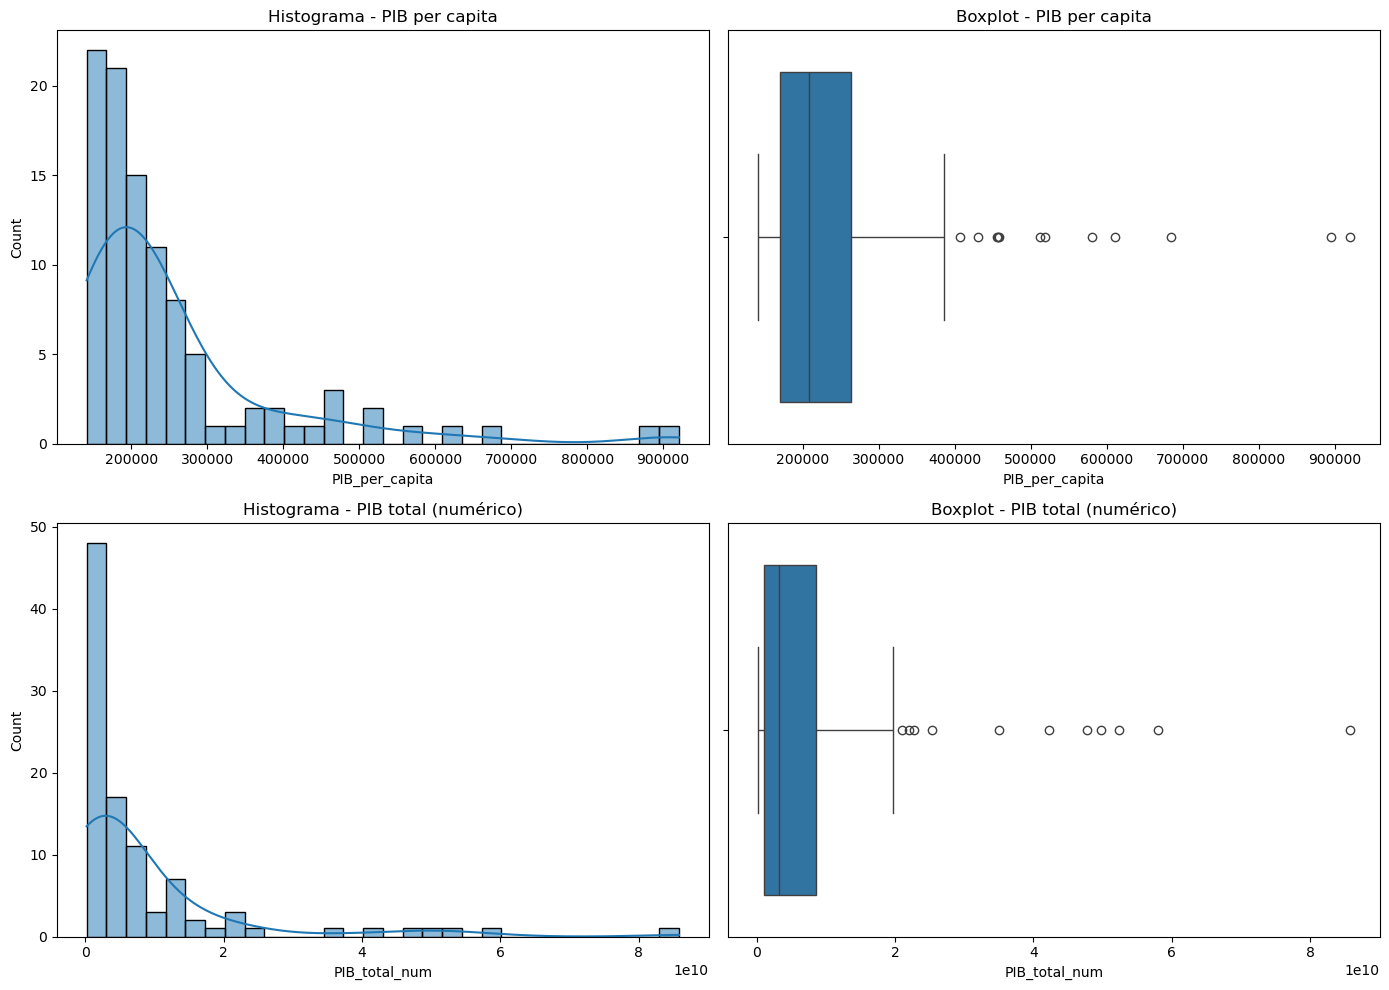

C:\Users\pedro\AppData\Local\Temp\ipykernel_40144\1202688575.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


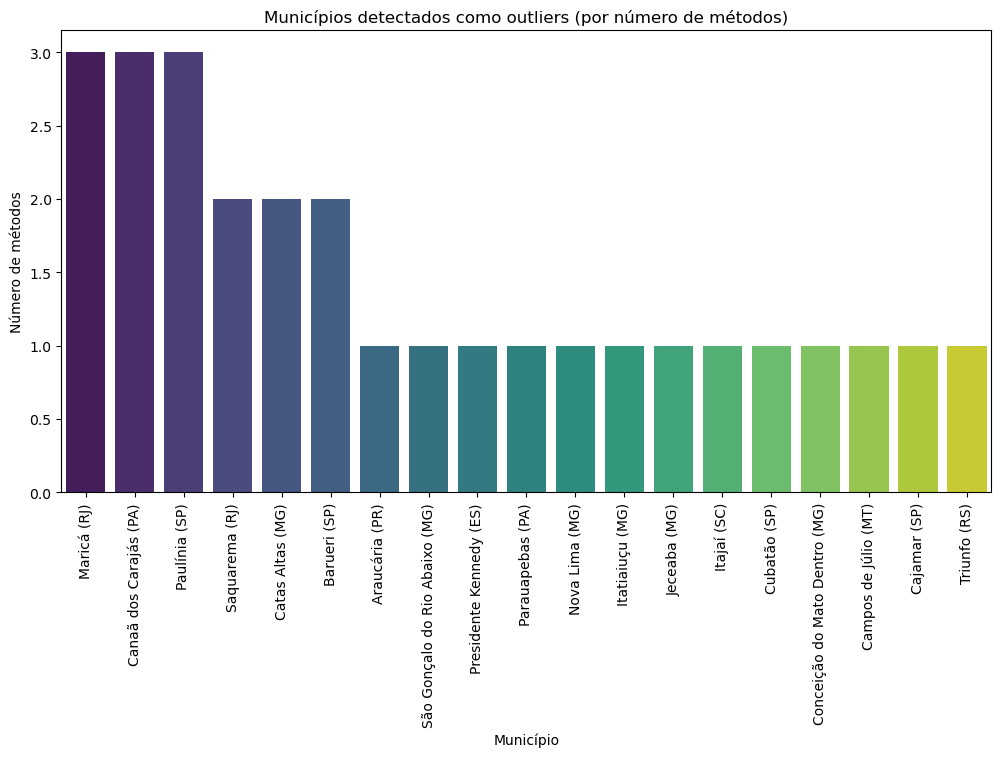

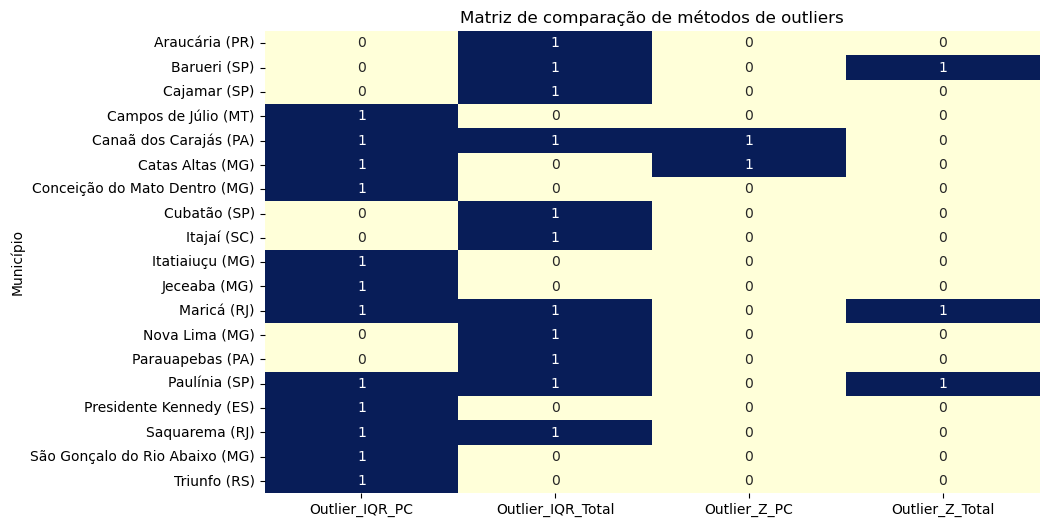

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Histogramas e Boxplots - df normal
# ===========================
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Histograma PIB_per_capita
sns.histplot(df["PIB_per_capita"], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Histograma - PIB per capita")

# Boxplot PIB_per_capita
sns.boxplot(x=df["PIB_per_capita"], ax=axes[0,1])
axes[0,1].set_title("Boxplot - PIB per capita")

# Histograma PIB_total_num
sns.histplot(df["PIB_total_num"], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Histograma - PIB total (numérico)")

# Boxplot PIB_total_num
sns.boxplot(x=df["PIB_total_num"], ax=axes[1,1])
axes[1,1].set_title("Boxplot - PIB total (numérico)")

plt.tight_layout()
plt.show()

# ===========================
# Gráfico para o comparativo de outliers
# ===========================
# Contagem de quantos métodos marcaram cada município como outlier
comparativo["N_outlier_methods"] = (
    comparativo[["Outlier_IQR_PC","Outlier_IQR_Total","Outlier_Z_PC","Outlier_Z_Total"]]
    .sum(axis=1)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=comparativo.sort_values("N_outlier_methods", ascending=False),
    x="Município", y="N_outlier_methods", palette="viridis"
)
plt.xticks(rotation=90)
plt.ylabel("Número de métodos")
plt.title("Municípios detectados como outliers (por número de métodos)")
plt.show()

# ===========================
# Heatmap comparativo de métodos
# ===========================
plt.figure(figsize=(10,6))
sns.heatmap(
    comparativo.set_index("Município")[["Outlier_IQR_PC","Outlier_IQR_Total","Outlier_Z_PC","Outlier_Z_Total"]],
    annot=True, cmap="YlGnBu", cbar=False
)
plt.title("Matriz de comparação de métodos de outliers")
plt.show()
